In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12290,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991080e+07,1.991080e+07,False,NaN,1,NaN,NaN,None,2025-08-24T10:51:00.000Z,114758.527669,5.298150e+10,-35.8399,-0.146776,-0.695447,-3.032035,-1.446203,7.144889,4.564138,2.284934e+12,57.5950,2.409929e+12,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
1,1027,Ethereum,ETH,ethereum,10467,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207072e+08,1.207072e+08,True,NaN,2,NaN,NaN,None,2025-08-24T10:51:00.000Z,4739.608715,2.746228e+10,-65.9228,-0.866633,0.442113,4.061853,27.464074,95.302260,85.047746,5.721047e+11,14.4207,5.721047e+11,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
2,52,XRP,XRP,xrp,1681,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-08-24T10:51:00.000Z,3.017506,3.568525e+09,-65.9404,-0.433681,-0.532283,-3.450731,-3.503363,37.832375,28.935461,1.794881e+11,4.5242,3.017506e+11,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
3,825,Tether USDt,USDT,tether,142531,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.671505e+11,1.697343e+11,True,NaN,4,NaN,NaN,None,2025-08-24T10:50:00.000Z,0.999762,9.110838e+10,-52.1508,0.017485,0.020532,-0.069466,-0.025459,-0.061545,-0.039398,1.671108e+11,4.2123,1.696939e+11,None,2025-08-24T10:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-24 10:52:56.942892
4,1839,BNB,BNB,bnb,2679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392874e+08,1.392874e+08,False,NaN,5,NaN,NaN,None,2025-08-24T10:50:00.000Z,862.951546,2.328768e+09,-36.6251,-0.712227,-2.821554,0.297744,12.258502,33.770761,27.839460,1.201982e+11,3.0298,1.201982e+11,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
5,5426,Solana,SOL,solana,974,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.404382e+08,6.081884e+08,True,NaN,6,5.252369e+08,1.077800e+11,None,2025-08-24T10:50:00.000Z,205.202630,7.021439e+09,-48.5382,-1.516774,1.187020,6.607237,13.619895,40.861394,15.798273,1.108993e+11,2.7954,1.248019e+11,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
6,3408,USDC,USDC,usd-coin,30790,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.753947e+10,6.753947e+10,False,NaN,7,6.090122e+10,6.089602e+10,None,2025-08-24T10:51:00.000Z,0.999915,1.033441e+10,-57.4588,0.009214,0.003770,-0.002063,-0.005056,0.015324,-0.007054,6.753370e+10,1.7023,6.753370e+10,None,2025-08-24T10:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-24 10:52:56.942892
7,74,Dogecoin,DOGE,dogecoin,1276,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.506497e+11,1.506497e+11,True,NaN,8,NaN,NaN,None,2025-08-24T10:50:00.000Z,0.230303,1.662079e+09,-69.2298,-0.887694,-2.433433,-1.303042,-0.436487,39.318914,1.439974,3.469510e+10,0.8745,3.469510e+10,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
8,1958,TRON,TRX,tron,1216,2017-09-13T00:00:00.000Z,"[media, payments, tron-ec

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now') # Changed 'Timestamp' to 'timestamp'

    df = pd.concat([df, df2], ignore_index=True)

In [6]:
# Use this if you want to create a csv and append data to it
    # df = pd.json_normalize(data['data'])
    # df['timestamp'] = pd.to_datetime('now')
    # df

    # if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
    #     df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    # else:
    #     df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)

    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [8]:
# df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
# df72

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12290,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.991080e+07,1.991080e+07,False,NaN,1,NaN,NaN,None,2025-08-24T10:51:00.000Z,114758.527669,5.298150e+10,-35.8399,-0.146776,-0.695447,-3.032035,-1.446203,7.144889,4.564138,2.284934e+12,57.5950,2.409929e+12,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
1,1027,Ethereum,ETH,ethereum,10467,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207072e+08,1.207072e+08,True,NaN,2,NaN,NaN,None,2025-08-24T10:51:00.000Z,4739.608715,2.746228e+10,-65.9228,-0.866633,0.442113,4.061853,27.464074,95.302260,85.047746,5.721047e+11,14.4207,5.721047e+11,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
2,52,XRP,XRP,xrp,1681,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.948226e+10,9.998582e+10,False,NaN,3,NaN,NaN,None,2025-08-24T10:51:00.000Z,3.017506,3.568525e+09,-65.9404,-0.433681,-0.532283,-3.450731,-3.503363,37.832375,28.935461,1.794881e+11,4.5242,3.017506e+11,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
3,825,Tether USDt,USDT,tether,142531,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.671505e+11,1.697343e+11,True,NaN,4,NaN,NaN,None,2025-08-24T10:50:00.000Z,0.999762,9.110838e+10,-52.1508,0.017485,0.020532,-0.069466,-0.025459,-0.061545,-0.039398,1.671108e+11,4.2123,1.696939e+11,None,2025-08-24T10:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-24 10:52:56.942892
4,1839,BNB,BNB,bnb,2679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392874e+08,1.392874e+08,False,NaN,5,NaN,NaN,None,2025-08-24T10:50:00.000Z,862.951546,2.328768e+09,-36.6251,-0.712227,-2.821554,0.297744,12.258502,33.770761,27.839460,1.201982e+11,3.0298,1.201982e+11,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
5,5426,Solana,SOL,solana,974,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.404382e+08,6.081884e+08,True,NaN,6,5.252369e+08,1.077800e+11,None,2025-08-24T10:50:00.000Z,205.202630,7.021439e+09,-48.5382,-1.516774,1.187020,6.607237,13.619895,40.861394,15.798273,1.108993e+11,2.7954,1.248019e+11,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
6,3408,USDC,USDC,usd-coin,30790,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.753947e+10,6.753947e+10,False,NaN,7,6.090122e+10,6.089602e+10,None,2025-08-24T10:51:00.000Z,0.999915,1.033441e+10,-57.4588,0.009214,0.003770,-0.002063,-0.005056,0.015324,-0.007054,6.753370e+10,1.7023,6.753370e+10,None,2025-08-24T10:51:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-24 10:52:56.942892
7,74,Dogecoin,DOGE,dogecoin,1276,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.506497e+11,1.506497e+11,True,NaN,8,NaN,NaN,None,2025-08-24T10:50:00.000Z,0.230303,1.662079e+09,-69.2298,-0.887694,-2.433433,-1.303042,-0.436487,39.318914,1.439974,3.469510e+10,0.8745,3.469510e+10,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
8,1958,TRON,TRX,tron,1216,2017-09-13T00:00:00.000Z,"[media, payments, tron-ec

In [10]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12290,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19910796.00000,19910796.00000,False,NaN,1,NaN,NaN,None,2025-08-24T10:51:00.000Z,114758.52767,52981502014.09512,-35.83990,-0.14678,-0.69545,-3.03204,-1.44620,7.14489,4.56414,2284933633687.52051,57.59500,2409929081059.24023,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
1,1027,Ethereum,ETH,ethereum,10467,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120707167.23569,120707167.23569,True,NaN,2,NaN,NaN,None,2025-08-24T10:51:00.000Z,4739.60871,27462281470.58358,-65.92280,-0.86663,0.44211,4.06185,27.46407,95.30226,85.04775,572104741771.01587,14.42070,572104741771.02002,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
2,52,XRP,XRP,xrp,1681,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,59482264023.00000,99985819185.00000,False,NaN,3,NaN,NaN,None,2025-08-24T10:51:00.000Z,3.01751,3568525135.89313,-65.94040,-0.43368,-0.53228,-3.45073,-3.50336,37.83237,28.93546,179488075820.25790,4.52420,301750578543.64001,None,2025-08-24T10:51:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
3,825,Tether USDt,USDT,tether,142531,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,167150540381.15668,169734252949.74066,True,NaN,4,NaN,NaN,None,2025-08-24T10:50:00.000Z,0.99976,91108382714.46461,-52.15080,0.01748,0.02053,-0.06947,-0.02546,-0.06154,-0.03940,167110757365.93204,4.21230,169693854992.57999,None,2025-08-24T10:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-08-24 10:52:56.942892
4,1839,BNB,BNB,bnb,2679,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139287366.38000,139287366.38000,False,NaN,5,NaN,NaN,None,2025-08-24T10:50:00.000Z,862.95155,2328768180.94586,-36.62510,-0.71223,-2.82155,0.29774,12.25850,33.77076,27.83946,120198248139.40041,3.02980,120198248139.39999,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
5,5426,Solana,SOL,solana,974,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,540438159.68419,608188416.03969,True,NaN,6,525236893.30000,107779991963.61693,None,2025-08-24T10:50:00.000Z,205.20263,7021439064.47967,-48.53820,-1.51677,1.18702,6.60724,13.61990,40.86139,15.79827,110899331807.45609,2.79540,124801862605.80000,None,2025-08-24T10:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-08-24 10:52:56.942892
6,3408,USDC,USDC,usd-coin,30790,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,67539471780.07863,67539471780.07863,False,NaN,7,60901219650.23000,60896016465.61597,None,2025-08-24T10:51:00.000Z,0.99991,10334409482.81832,-57.45880,0.00921,0.00377,-0.00206,-0.00506,0.01532,-0.00705,67533701446.70232,1.70230,67533701446.70000,None,2025-08-24T10:51:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-08-24 10:52:56.942892
7,74,Dogecoin,DOGE,dogecoin,1276,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150649666383.70520,150649666383.70520,True,NaN,8,NaN,NaN,None,2025-08-24T10:50:00.000Z,0.23030,1662079433.95212,-69.22980,-0.88769,-2.43343,-1.30304,-0.43649,39.31891,1.43997,3469509

In [12]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03994,-0.62761,-2.97970,-1.38119,7.23158,4.70988
Ethereum,-0.75143,0.52152,3.92585,27.55166,95.40125,85.27301
XRP,-0.40812,-0.55946,-3.51077,-3.58112,37.72226,28.96142
Tether USDt,0.01652,0.01697,-0.06658,-0.03460,-0.06372,-0.04239
BNB,-0.70838,-2.83322,0.31130,12.20695,33.73210,27.86059
Solana,-1.56599,1.24169,6.47440,13.43463,40.61792,15.82866
USDC,0.01502,0.00784,0.00521,0.00484,0.00967,0.01947
Dogecoin,-0.90438,-2.50727,-1.39451,-0.61018,39.16035,1.56483
TRON,-0.23403,1.06613,3.76256,15.94558,33.58109,33.75814


In [13]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.03994
             quote.USD.percent_change_24h   -0.62761
             quote.USD.percent_change_7d    -2.97970
             quote.USD.percent_change_30d   -1.38119
             quote.USD.percent_change_60d    7.23158
             quote.USD.percent_change_90d    4.70988
Ethereum     quote.USD.percent_change_1h    -0.75143
             quote.USD.percent_change_24h    0.52152
             quote.USD.percent_change_7d     3.92585
             quote.USD.percent_change_30d   27.55166
             quote.USD.percent_change_60d   95.40125
             quote.USD.percent_change_90d   85.27301
XRP          quote.USD.percent_change_1h    -0.40812
             quote.USD.percent_change_24h   -0.55946
             quote.USD.percent_change_7d    -3.51077
             quote.USD.percent_change_30d   -3.58112
             quote.USD.percent_change_60d   37.72226
             quote.USD.percent_change_90d   28.96142
Tether USDt  quote.USD.percent_change_1h     0.01652
             quote.USD.percent_change_24h    0.01697
             quote.USD.percent_change_7d    -0.06658
             quote.USD.percent_change_30d   -0.03460
             quote.USD.percent_change_60d   -0.06372
             quote.USD.percent_change_90d   -0.04239
BNB          quote.USD.percent_change_1h    -0.70838
             quote.USD.percent_change_24h   -2.83322
             quote.USD.percent_change_7d     0.31130
             quote.USD.percent_change_30d   12.20695
             quote.USD.percent_change_60d   33.73210
             quote.USD.percent_change_90d   27.86059
Solana       quote.USD.percent_change_1h    -1.56599
             quote.USD.percent_change_24h    1.24169
             quote.USD.percent_change_7d     6.47440
             quote.USD.percent_change_30d   13.43463
             quote.USD.percent_change_60d   40.61792
             quote.USD.percent_change_90d   15.82866
USDC         quote.USD.percent_change_1h     0.01502
             quote.USD.percent_change_24h    0.00784
             quote.USD.percent_change_7d     0.00521
             quote.USD.percent_change_30d    0.00484
             quote.USD.percent_change_60d    0.00967
             quote.USD.percent_change_90d    0.01947
Dogecoin     quote.USD.percent_change_1h    -0.90438
             quote.USD.percent_change_24h   -2.50727
             quote.USD.percent_change_7d    -1.39451
             quote.USD.percent_change_30d   -0.61018
             quote.USD.percent_change_60d   39.16035
             quote.USD.percent_change_90d    1.56483
TRON         quote.USD.percent_change_1h    -0.23403
             quote.USD.percent_change_24h    1.06613
             quote.USD.percent_change_7d     3.76256
             quote.USD.percent_change_30d   15.94558
             quote.USD.percent_change_60d   33.58109
             quote.USD.percent_change_90d   33.75814
Cardano      quote.USD.percent_change_1h    -0.97098
             quote.USD.percent_change_24h   -2.22583
             quote.USD.percent_change_7d    -7.86040
             quote.USD.percent_change_30d   10.34861
             quote.USD.percent_change_60d   54.41029
             quote.USD.percent_change_90d   16.49631
Chainlink    quote.USD.percent_change_1h    -0.16233
             quote.USD.percent_change_24h   -0.94916
             quote.USD.percent_change_7d     2.90258
             quote.USD.percent_change_30d   40.30389
             quote.USD.percent_change_60d   91.29514
             quote.USD.percent_change_90d   61.22275
Hyperliquid  quote.USD.percent_change_1h    -1.56675
             quote.USD.percent_change_24h   -0.48062
             quote.USD.percent_change_7d    -8.48061
             quote.USD.percent_change_30d    0.86219
             quote.USD.percent_change_60d   14.06601
             quote.USD.percent_change_90d   14.29331
Sui          quote.USD.percent_change_1h    -1.72217
             quote.USD.percent_change_24h   -2.64300
             quote.USD.percent_chang

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.03994
            quote.USD.percent_change_24h -0.62761
            quote.USD.percent_change_7d  -2.97970
            quote.USD.percent_change_30d -1.38119
            quote.USD.percent_change_60d  7.23158
            quote.USD.percent_change_90d  4.70988
Ethereum    quote.USD.percent_change_1h  -0.75143
            quote.USD.percent_change_24h  0.52152
            quote.USD.percent_change_7d   3.92585
            quote.USD.percent_change_30d 27.55166
            quote.USD.percent_change_60d 95.40125
            quote.USD.percent_change_90d 85.27301
XRP         quote.USD.percent_change_1h  -0.40812
            quote.USD.percent_change_24h -0.55946
            quote.USD.percent_change_7d  -3.51077
            quote.USD.percent_change_30d -3.58112
            quote.USD.percent_change_60d 37.72226
            quote.USD.percent_change_90d 28.96142
Tether USDt quote.USD.percent_change_1h   0.01652
            quote.USD.percent_change_24h  0.01697
            quote.USD.percent_change_7d  -0.06658
            quote.USD.percent_change_30d -0.03460
            quote.USD.percent_change_60d -0.06372
            quote.USD.percent_change_90d -0.04239
BNB         quote.USD.percent_change_1h  -0.70838
            quote.USD.percent_change_24h -2.83322
            quote.USD.percent_change_7d   0.31130
            quote.USD.percent_change_30d 12.20695
            quote.USD.percent_change_60d 33.73210
            quote.USD.percent_change_90d 27.86059
Solana      quote.USD.percent_change_1h  -1.56599
            quote.USD.percent_change_24h  1.24169
            quote.USD.percent_change_7d   6.47440
            quote.USD.percent_change_30d 13.43463
            quote.USD.percent_change_60d 40.61792
            quote.USD.percent_change_90d 15.82866
USDC        quote.USD.percent_change_1h   0.01502
            quote.USD.percent_change_24h  0.00784
            quote.USD.percent_change_7d   0.00521
            quote.USD.percent_change_30d  0.00484
            quote.USD.percent_change_60d  0.00967
            quote.USD.percent_change_90d  0.01947
Dogecoin    quote.USD.percent_change_1h  -0.90438
            quote.USD.percent_change_24h -2.50727
            quote.USD.percent_change_7d  -1.39451
            quote.USD.percent_change_30d -0.61018
            quote.USD.percent_change_60d 39.16035
            quote.USD.percent_change_90d  1.56483
TRON        quote.USD.percent_change_1h  -0.23403
            quote.USD.percent_change_24h  1.06613
            quote.USD.percent_change_7d   3.76256
            quote.USD.percent_change_30d 15.94558
            quote.USD.percent_change_60d 33.58109
            quote.USD.percent_change_90d 33.75814
Cardano     quote.USD.percent_change_1h  -0.97098
            quote.USD.percent_change_24h -2.22583
            quote.USD.percent_change_7d  -7.86040
            quote.USD.percent_change_30d 10.34861
            quote.USD.percent_change_60d 54.41029
            quote.USD.percent_change_90d 16.49631
Chainlink   quote.USD.percent_change_1h  -0.16233
            quote.USD.percent_change_24h -0.94916
            quote.USD.percent_change_7d   2.90258
            quote.USD.percent_change_30d 40.30389
            quote.USD.percent_change_60d 91.29514
            quote.USD.percent_change_90d 61.22275
Hyperliquid quote.USD.percent_change_1h  -1.56675
            quote.USD.percent_change_24h -0.48062
            quote.USD.percent_change_7d  -8.48061
            quote.USD.percent_change_30d  0.86219
            quote.USD.percent_change_60d 14.06601
            quote.USD.percent_change_90d 14.29331
Sui         quote.USD.percent_change_1h  -1.72217
            quote.USD.percent_change_24h -2.64300
            quote.USD.percent_change_7d  -5.36141
            quote.USD.percent_change_30d -3.15667
            quote.USD.percent_change_60d 30.24609
            quote.USD.percent_change_90d  1.11926
Stellar     quote.USD.percent_change_1h  -0

In [16]:
df5.count()

,0
values,90


In [17]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,-0.03994
1,-0.62761
2,-2.97970
3,-1.38119
4,7.23158
5,4.70988
6,-0.75143
7,0.52152
8,3.92585
9,27.55166


In [18]:
# Change the column name

# df7 = df6.rename(columns={'level_1': 'percent_change'})
df7 = df6.rename(columns={'values': 'percent_change'})
df7

,percent_change
0,-0.03994
1,-0.62761
2,-2.97970
3,-1.38119
4,7.23158
5,4.70988
6,-0.75143
7,0.52152
8,3.92585
9,27.55166


In [19]:
# Change the column name

df7 = df5.reset_index()
df7 = df7.rename(columns={'level_0': 'name', 'level_1': 'percent_change', 'values': 'values'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03994
1,Bitcoin,quote.USD.percent_change_24h,-0.62761
2,Bitcoin,quote.USD.percent_change_7d,-2.97970
3,Bitcoin,quote.USD.percent_change_30d,-1.38119
4,Bitcoin,quote.USD.percent_change_60d,7.23158
5,Bitcoin,quote.USD.percent_change_90d,4.70988
6,Ethereum,quote.USD.percent_change_1h,-0.75143
7,Ethereum,quote.USD.percent_change_24h,0.52152
8,Ethereum,quote.USD.percent_change_7d,3.92585
9,Ethereum,quote.USD.percent_change_30d,27.55166


In [20]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            90 non-null     object 
 1   percent_change  90 non-null     object 
 2   values          90 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 10000x1000 with 0 Axes>

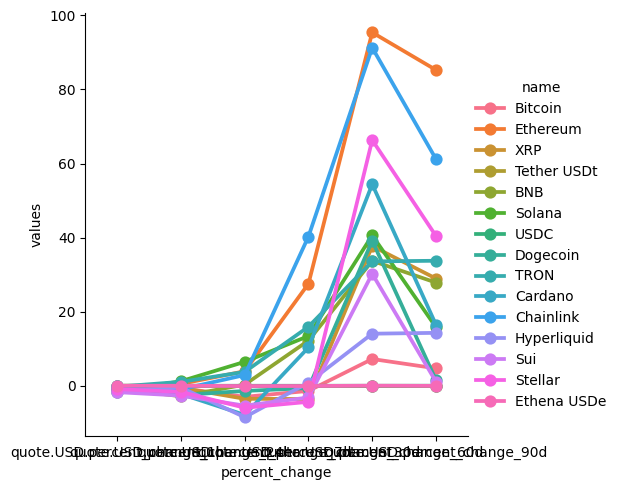

In [22]:
plt.figure(figsize=(100,10))
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [23]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,114758.52767,2025-08-24 10:52:56.942892
15,Bitcoin,114758.52767,2025-08-24 10:52:57.293594
30,Bitcoin,114824.22733,2025-08-24 10:53:57.849682
45,Bitcoin,114847.66085,2025-08-24 10:54:57.953824
60,Bitcoin,114847.66085,2025-08-24 10:55:58.142632
75,Bitcoin,114912.94312,2025-08-24 10:56:58.690525
90,Bitcoin,114883.67933,2025-08-24 10:57:58.801381


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

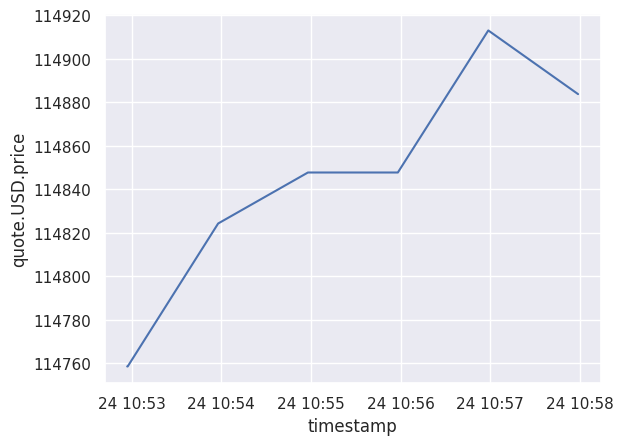

In [24]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)